# Find the company that will have the highest median value in the future

In [1]:
# Import the nessecary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

C:\Users\patri\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
# Import the Ecommerce data as a pandas df
data = pd.read_csv('Ecommerce_data.csv')

# View the dataset
print(data.info())

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sale       506 non-null    float64
 1   por_OS     506 non-null    float64
 2   por_NON    506 non-null    float64
 3   recc       506 non-null    int64  
 4   avg_no_it  506 non-null    float64
 5   age        506 non-null    float64
 6   dis        506 non-null    float64
 7   diff_reg   506 non-null    int64  
 8   tax        506 non-null    int64  
 9   bk         506 non-null    float64
 10  lowstat    506 non-null    float64
 11  Median_s   506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB
None


,Sale,por_OS,por_NON,recc,avg_no_it,age,dis,diff_reg,tax,bk,lowstat,Median_s
0,0.63,18.0,2.31,0,6.575,65.2,4.0900,1,296,396.90,4.98,24.0
1,2.73,0.0,7.07,0,6.421,78.9,4.9671,2,242,396.90,9.14,21.6
2,2.73,0.0,7.07,0,7.185,61.1,4.9671,2,242,392.83,4.03,34.7
3,3.24,0.0,2.18,0,6.998,45.8,6.0622,3,222,394.63,2.94,33.4
4,6.91,0.0,2.18,0,7.147,54.2,6.0622,3,222,396.90,5.33,36.2


### First impression

The dataset shows no null data and therefore there is no need to replace any empty values.

In [4]:
# Select the dependent and independent variables 
y = data['Median_s'].values.reshape(-1, 1)
x = data['avg_no_it'].values.reshape(-1, 1)

# Fit the model using fit() method
lm = LinearRegression()

lm.fit(x, y)

LinearRegression()

In [5]:
# Make predictions
lm.predict(x)

array([[25.17574577],
       [23.77402099],
       [30.72803225],
       [29.02593787],
       [30.38215211],
       [23.85593997],
       [20.05125842],
       [21.50759586],
       [16.5833549 ],
       [19.97844155],
       [23.3735282 ],
       [20.02395209],
       [18.93169901],
       [19.47782555],
       [20.81583557],
       [18.43108302],
       [19.35039603],
       [19.85101202],
       [14.99048582],
       [17.45715736],
       [16.02812625],
       [19.6234593 ],
       [21.23453259],
       [18.23993873],
       [19.25027283],
       [16.29208741],
       [18.23993873],
       [20.36983223],
       [24.44757706],
       [26.07685456],
       [17.32972783],
       [20.59738496],
       [19.48692766],
       [17.22050253],
       [20.81583557],
       [19.33219181],
       [18.49479778],
       [18.57671676],
       [19.63256141],
       [25.35778795],
       [29.26259271],
       [26.95065703],
       [21.48028953],
       [21.86257811],
       [20.57007863],
       [17

In [6]:
# Call out the intercept
lm.intercept_

array([-34.67062078])

In [7]:
# Estimate the coefficient
lm.coef_

array([[9.10210898]])

# Splitting the training and test sets

In [9]:
from sklearn.model_selection import train_test_split

# Create subsets and define the split and randomness of the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 100)

# Run a regression test and visualize the training data 
lm.fit(x_train, y_train)

y_pred = lm.predict(x_train)

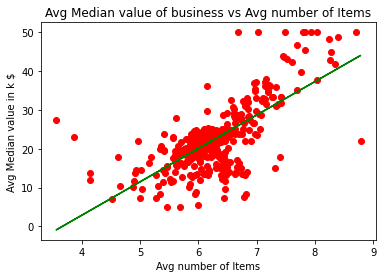

In [11]:
# Plot the result on the train set
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, y_pred, color = 'green')
plt.title('Avg Median value of business vs Avg number of Items')
plt.xlabel('Avg number of Items')
plt.ylabel('Avg Median value in k $')

plt.show()

In [12]:
# Check for R squared score
print(lm.score(x_train, y_train))

0.49581033699518595


In [13]:
# Calculate intercept and coefficient 
print(lm.intercept_)
print(lm.coef_)

[-31.59297296]
[[8.61195199]]


### Now apply the regression on the test set

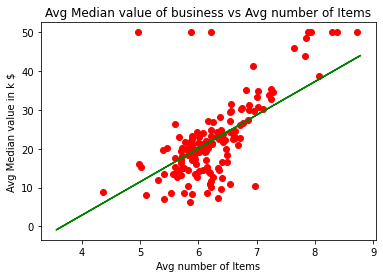

In [16]:
# Plot the scatter plot
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, y_pred, color = 'green')
plt.title('Avg Median value of business vs Avg number of Items')
plt.xlabel('Avg number of Items')
plt.ylabel('Avg Median value in k $')

plt.show()

In [17]:
# Check the R squared, intercept and coefficient
print(lm.score(x_test, y_test))
print(lm.intercept_)
print(lm.coef_)

0.45764736329252076
[-31.59297296]
[[8.61195199]]
